### IS

In [175]:
import pandas as pd

methods = ["basic", "moment20", "filter10", "copula20"]
num_scenarios = [10, 50, 100]

final_rows = []

for ns in num_scenarios:
    for method in methods:
        base_folder = f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(ns)}"

        rows = []

        for i in range(1, 31):
            objective_value_path = base_folder + "/" + str(i) + "/results_objective.csv"
            df_obj_value = pd.read_csv(objective_value_path)
            obj_value = float(df_obj_value.columns[0].split(":")[1])
            rows.append({"instance": i, "obj_value": obj_value})

        df = pd.DataFrame(rows)
        mean_value = df['obj_value'].mean()
        std_value = df['obj_value'].std()
        rel_std = std_value / mean_value * 100 # %

        final_rows.append({"method": f"{method}_sce{ns}", "obj_value_mean": mean_value, "obj_value_std": std_value, "rel_std (%)": rel_std})

result_df = pd.DataFrame(final_rows)
result_df

,method,obj_value_mean,obj_value_std,rel_std (%)
0,basic_sce10,1.406774e+12,2.605461e+10,1.852082
1,moment20_sce10,1.423741e+12,3.092894e+10,2.172372
2,filter10_sce10,1.413732e+12,2.396812e+10,1.695380
3,copula20_sce10,1.405157e+12,2.726997e+10,1.940707
4,basic_sce50,1.429486e+12,8.867438e+09,0.620324
5,moment20_sce50,1.434133e+12,1.071345e+10,0.747033
6,filter10_sce50,1.422417e+12,1.185882e+10,0.833709
7,copula20_sce50,1.426832e+12,1.157384e+10,0.811156
8,basic_sce100,1.430104e+12,6.991673e+09,0.488893
9,moment20_sce100,1.433287e+12,8.095171e+09,0.564798


### OOS

In [209]:
methods = ["basic", "moment20", "filter10", "copula20"]
num_scenarios = [10, 50, 100]

final_rows = []

for ns in num_scenarios:
    for method in methods:
        base_folder = f"NewOOS/dataset_europe_agg_v50/{method}_sce{str(ns)}"

        rows = []

        for i in range(1, 31):
            oos_value = 0
            for j in range(1, 11):
                oos_value_path = base_folder + f"_{i}/oos_tree{j}/out_of_sample_values.csv"
                df_oos_value = pd.read_csv(oos_value_path)
                oos_tree_value = float(df_oos_value["Objective value"][0])
                oos_value += oos_tree_value
            rows.append({"instance": i, "oos_value": oos_value / 10})

        df = pd.DataFrame(rows)
        mean_value = df['oos_value'].mean()
        std_value = df['oos_value'].std()
        rel_std = std_value / mean_value * 100 # %

        final_rows.append({"method": f"{method}_sce{ns}", "oos_value_mean": mean_value, "oos_value_std": std_value, "rel_std (%)": rel_std})

result_df = pd.DataFrame(final_rows)
result_df

,method,oos_value_mean,oos_value_std,rel_std (%)
0,basic_sce10,1.970898e+12,6.065671e+11,30.776179
1,moment20_sce10,1.888979e+12,4.963423e+11,26.275693
2,filter10_sce10,1.578661e+12,2.223120e+11,14.082317
3,copula20_sce10,2.143418e+12,6.772488e+11,31.596668
4,basic_sce50,1.457091e+12,3.573265e+10,2.452328
5,moment20_sce50,1.449881e+12,1.344816e+10,0.927535
6,filter10_sce50,1.450668e+12,2.225546e+10,1.534153
7,copula20_sce50,1.470210e+12,4.788603e+10,3.257086
8,basic_sce100,1.454486e+12,1.786478e+10,1.228254
9,moment20_sce100,1.453194e+12,3.119148e+10,2.146408


### Generator boxplots

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_4454/2705250132.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_4454/2705250132.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_4454/2705250132.py:59: Futu

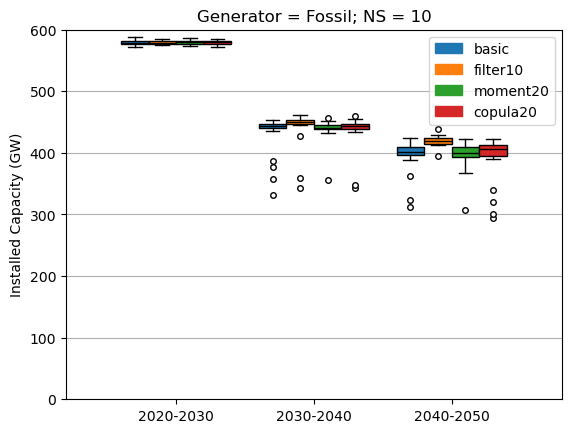

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# All fossil types
FOSSIL_TYPES = ['Liginite existing',
'Lignite',
'Lignite CCS adv',
'Coal existing',
'Coal',
'Coal CCS adv',
'Gas existing',
'Gas OCGT',
'Gas CCGT',
'Gas CCS adv',
'Oil existing',
'Bio existing',
'Bio 10 cofiring',
'Nuclear',
'Bio',
'Geo',
'Bio 10 cofiring CCS',
'Lignite CCS sup',
'Coal CCS',
'Gas CCS',
'Waste']

# Remove whitespace from strings in the list
FOSSIL_TYPES = [fossil.replace(" ", "") for fossil in FOSSIL_TYPES]

FOSSIL = True

genType = 'Bio'
methods = ["basic", "filter10", "moment20", "copula20"]
num_scenarios = 10

def get_dataframes(methods, num_scenarios):
    dataframes = []
    for method in methods: 
        dataframes.append([pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(num_scenarios)}/{i}/results_output_gen.csv") for i in range(1, 31)])
    return dataframes

def aggregate_dataframes(dataframes):
    # Initialize empty DataFrames to store the aggregated installed capacity values for each method and period
    aggregated_data = pd.DataFrame(columns=['Period', 'genInstalledCap_MW'])

    # Iterate through the dataframes for method
    for df in dataframes:
        # Filter the dataframe for GeneratorType genType
        if FOSSIL:
            filtered_data = df[df['GeneratorType'].isin(FOSSIL_TYPES)]
        else: 
            filtered_data = df[df['GeneratorType'] == genType]
        
        # Group the filtered data by period and sum the installed capacity values within each group
        grouped_data = filtered_data.groupby('Period')['genInstalledCap_MW'].sum().reset_index()
        
        # Concatenate the grouped data with the aggregated DataFrame for Method 1
        aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
    
    # Convert MW to GW
    aggregated_data['genInstalledCap_GW'] = aggregated_data['genInstalledCap_MW'] / 1000
    return aggregated_data

all_dataframes = get_dataframes(methods, num_scenarios)
aggregated_dataframes = [aggregate_dataframes(dfs) for dfs in all_dataframes]
all_aggregated_data = [aggregated_data['genInstalledCap_GW'].groupby(aggregated_data['Period']).apply(list) for aggregated_data in aggregated_dataframes]

# Define positions for each boxplot
positions = [1, 2, 3]

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

# Create boxplots for each method and period
for i, data in enumerate(all_aggregated_data):
    plt.boxplot(data, positions=[pos + i*0.2 - 0.3 for pos in positions], widths=0.2, patch_artist=True, boxprops=dict(facecolor=f"C{i}"), medianprops=medianlineprops, flierprops=flierprops)

# Add labels and title
plt.ylabel('Installed Capacity (GW)')
plt.title(f'Generator = {'Fossil' if FOSSIL else genType}; NS = {num_scenarios}')
plt.ylim(0, 600)
plt.grid(axis="y")

# Customize x-axis labels
plt.xticks(range(1, 4), ['2020-2030', '2030-2040', '2040-2050'])

# Create custom legend for different groups (methods)
legend_handles = [mpatches.Patch(color=f'C{i}', label=methods[i]) for i in range(len(methods))]
plt.legend(handles=legend_handles)

# Show/save the plot
plt.savefig(f"Boxplots/{'Fossil' if FOSSIL else genType}-{num_scenarios}scenarios")
plt.show()

### In-sample boxplots

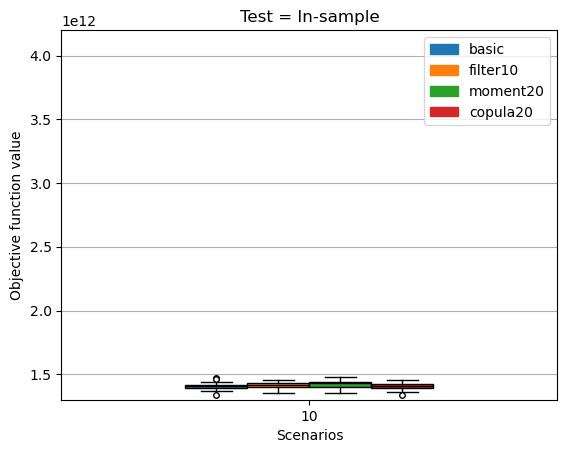

In [205]:
methods = ["basic", "filter10", "moment20", "copula20"]
num_scenarios = [10]

def get_objective_values(methods, num_scenarios):
    objective_values = []
    for method in methods:
        obj_by_method = []
        for ns in num_scenarios:
            dataframes = [pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(ns)}/{i}/results_objective.csv") for i in range(1, 31)]
            instance_values = [float(df_obj_value.columns[0].split(":")[1]) for df_obj_value in dataframes]
            obj_by_method.append(instance_values)
        objective_values.append(obj_by_method)
    return objective_values

all_objective_values = get_objective_values(methods, num_scenarios)

# Define positions for each boxplot
positions = [i for i in range(1, len(num_scenarios) + 1)]

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

# Create boxplots for each method and period
for i, data in enumerate(all_objective_values):
    plt.boxplot(data, positions=[pos + i*0.2 - 0.3 for pos in positions], widths=0.2, patch_artist=True, boxprops=dict(facecolor=f"C{i}"), medianprops=medianlineprops, flierprops=flierprops)

# Add labels and title
plt.xlabel("Scenarios")
plt.ylabel('Objective function value')
plt.title(f'Test = In-sample')
plt.ylim(1.3*10**12, 4.2*10**12)
plt.grid(axis="y")

# Customize x-axis labels
plt.xticks(range(1, len(num_scenarios) + 1), [ns for ns in num_scenarios])

# Create custom legend for different groups (methods)
legend_handles = [mpatches.Patch(color=f'C{i}', label=methods[i]) for i in range(len(methods))]
plt.legend(handles=legend_handles)

# Show/save the plot
plt.savefig(f"Boxplots/In-sample-10-scenarios")
plt.show()

### OOS boxplots

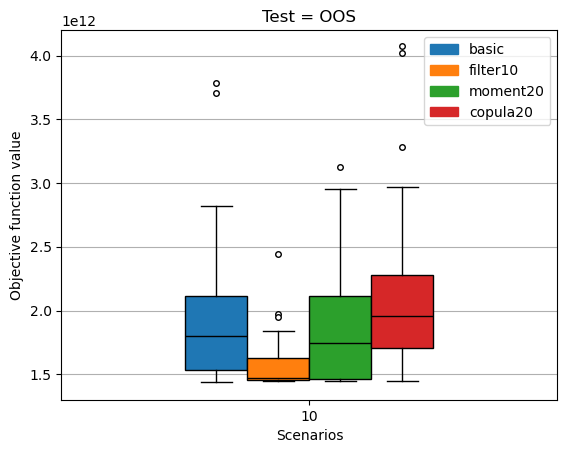

In [202]:
methods = ["basic", "filter10", "moment20", "copula20"]
num_scenarios = [10]

def get_objective_values(methods, num_scenarios):
    objective_values = []
    for method in methods:
        obj_by_method = []
        for ns in num_scenarios:
            instance_values = []
            for i in range(1, 31):
                base_path = f"NewOOS/dataset_europe_agg_v50/{method}_sce{str(ns)}_{i}/"
                oos_values_for_inst = []
                for j in range(1, 11):
                    path_to_df = base_path + f"oos_tree{j}/out_of_sample_values.csv"
                    df_oos_value = pd.read_csv(path_to_df)
                    oos_value = float(df_oos_value["Objective value"][0])
                    oos_values_for_inst.append(oos_value)
                instance_values.append(sum(oos_values_for_inst) / len(oos_values_for_inst))
            obj_by_method.append(instance_values)
        objective_values.append(obj_by_method)
    return objective_values

all_objective_values = get_objective_values(methods, num_scenarios)

# Define positions for each boxplot
positions = [i for i in range(1, len(num_scenarios) + 1)]

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

# Create boxplots for each method and period
for i, data in enumerate(all_objective_values):
    plt.boxplot(data, positions=[pos + i*0.2 - 0.3 for pos in positions], widths=0.2, patch_artist=True, boxprops=dict(facecolor=f"C{i}"), medianprops=medianlineprops, flierprops=flierprops)

# Add labels and title
plt.xlabel("Scenarios")
plt.ylabel('Objective function value')
plt.title(f'Test = OOS')
plt.ylim(1.3*10**12, 4.2*10**12)
plt.grid(axis="y")

# Customize x-axis labels
plt.xticks(range(1, len(num_scenarios) + 1), [ns for ns in num_scenarios])

# Create custom legend for different groups (methods)
legend_handles = [mpatches.Patch(color=f'C{i}', label=methods[i]) for i in range(len(methods))]
plt.legend(handles=legend_handles)

# Show/save the plot
plt.savefig(f"Boxplots/OOS-10-scenarios")
plt.show()

### Test filter10_sce100_1 outlier

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_4454/3771068600.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_4454/3771068600.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)


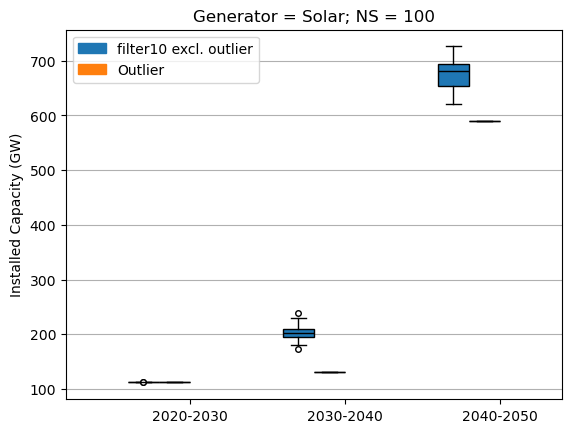

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# All fossil types
FOSSIL_TYPES = ['Liginite existing',
'Lignite',
'Lignite CCS adv',
'Coal existing',
'Coal',
'Coal CCS adv',
'Gas existing',
'Gas OCGT',
'Gas CCGT',
'Gas CCS adv',
'Oil existing',
'Bio existing',
'Bio 10 cofiring',
'Nuclear',
'Bio',
'Geo',
'Bio 10 cofiring CCS',
'Lignite CCS sup',
'Coal CCS',
'Gas CCS',
'Waste']

# Remove whitespace from strings in the list
FOSSIL_TYPES = [fossil.replace(" ", "") for fossil in FOSSIL_TYPES]

FOSSIL = False

genType = 'Solar'
methods = ["filter10"]
num_scenarios = 100

def get_dataframes(methods, num_scenarios):
    dataframes = []
    for method in methods: 
        dataframes.append([pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(num_scenarios)}/{i}/results_output_gen.csv") for i in range(2, 31)])
    # The outlier
    dataframes.append([pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{methods[0]}/{str(num_scenarios)}/1/results_output_gen.csv")])
    return dataframes

def aggregate_dataframes(dataframes):
    # Initialize empty DataFrames to store the aggregated installed capacity values for each method and period
    aggregated_data = pd.DataFrame(columns=['Period', 'genInstalledCap_MW'])

    # Iterate through the dataframes for method
    for df in dataframes:
        # Filter the dataframe for GeneratorType genType
        if FOSSIL:
            filtered_data = df[df['GeneratorType'].isin(FOSSIL_TYPES)]
        else: 
            filtered_data = df[df['GeneratorType'] == genType]
        
        # Group the filtered data by period and sum the installed capacity values within each group
        grouped_data = filtered_data.groupby('Period')['genInstalledCap_MW'].sum().reset_index()
        
        # Concatenate the grouped data with the aggregated DataFrame for Method 1
        aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
    
    # Convert MW to GW
    aggregated_data['genInstalledCap_GW'] = aggregated_data['genInstalledCap_MW'] / 1000
    return aggregated_data

all_dataframes = get_dataframes(methods, num_scenarios)
aggregated_dataframes = [aggregate_dataframes(dfs) for dfs in all_dataframes]
all_aggregated_data = [aggregated_data['genInstalledCap_GW'].groupby(aggregated_data['Period']).apply(list) for aggregated_data in aggregated_dataframes]

# Define positions for each boxplot
positions = [1, 2, 3]

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

# Create boxplots for each method and period
for i, data in enumerate(all_aggregated_data):
    plt.boxplot(data, positions=[pos + i*0.2 - 0.3 for pos in positions], widths=0.2, patch_artist=True, boxprops=dict(facecolor=f"C{i}"), medianprops=medianlineprops, flierprops=flierprops)

# Add labels and title
plt.ylabel('Installed Capacity (GW)')
plt.title(f'Generator = {'Fossil' if FOSSIL else genType}; NS = {num_scenarios}')
#plt.ylim(0, 600)
plt.grid(axis="y")

# Customize x-axis labels
plt.xticks(range(1, 4), ['2020-2030', '2030-2040', '2040-2050'])

# Create custom legend for different groups (methods)
labels = ["filter10 excl. outlier", "Outlier"]
legend_handles = [mpatches.Patch(color=f'C{i}', label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_handles)

# Show/save the plot
#plt.savefig(f"Boxplots/{'Fossil' if FOSSIL else genType}-{num_scenarios}scenarios")
plt.show()